## Run these cells just once

In [10]:
import numpy
print( 'numpy version: ', numpy.__version__ )

import matplotlib
print( 'matplotlib version: ', matplotlib.__version__ )
import lsst.daf.butler as dafButler
# What version of the LSST Science Pipelnes are we using?
! echo $IMAGE_DESCRIPTION
! eups list -s | grep lsst_distrib

import pandas
pandas.set_option('display.max_rows', 1000)

from IPython.display import Markdown as md

import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib') 

# from rubin_jupyter_utils.lab.notebook import get_catalog, retrieve_query    
from rubin_jupyter_utils.lab.notebook import get_tap_service, retrieve_query    

# allow for matplotlib to create inline plots in our notebook
%matplotlib inline
import matplotlib.pyplot as plt      # imports matplotlib.pyplot as plt
import warnings                      # imports the warnings library

from astropy.wcs import WCS          # imports astropy's World Coordinate System function WCS


repo = 's3://butler-us-central1-dp01'  
collection='2.2i/runs/DP0.1'

# Deprecated
# service = get_catalog()
service = get_tap_service()
butler = dafButler.Butler(repo,collections=collection)

numpy version:  1.20.2
matplotlib version:  3.4.2
Recommended (Weekly 2021_25)
lsst_distrib          21.0.0-3-gc37e2ab+2186fb90a2 	w_2021_25 current setup


## Find object based on sensor ID and visit

{'visit': 192350, 'detector': 128, 'band': 'i'}


/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/obs_base/21.0.0-57-g32d1671+cfd65995c3/python/lsst/obs/base/formatters/fitsExposure.py:622: UserWarning: Data ID {instrument: 'LSSTCam-imSim', detector: 128, visit: 192350} is missing (implied) value(s) for ['band', 'physical_filter']; the correctness of this Exposure's FilterLabel cannot be guaranteed. Call Registry.expandDataId before Butler.get to avoid this.
  warnings.warn(f"Data ID {self.dataId} is missing (implied) value(s) for {missing}; "


<Figure size 432x288 with 0 Axes>

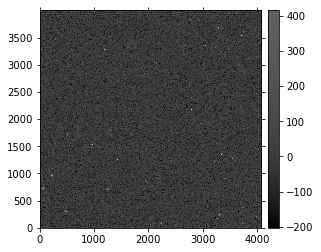

{'visit': 192350, 'detector': 135, 'band': 'i'}


/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.6.0/Linux64/obs_base/21.0.0-57-g32d1671+cfd65995c3/python/lsst/obs/base/formatters/fitsExposure.py:622: UserWarning: Data ID {instrument: 'LSSTCam-imSim', detector: 135, visit: 192350} is missing (implied) value(s) for ['band', 'physical_filter']; the correctness of this Exposure's FilterLabel cannot be guaranteed. Call Registry.expandDataId before Butler.get to avoid this.
  warnings.warn(f"Data ID {self.dataId} is missing (implied) value(s) for {missing}; "


<Figure size 432x288 with 0 Axes>

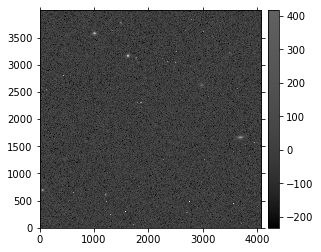

{'visit': 192350, 'detector': 136, 'band': 'i'}


KeyboardInterrupt: 

In [11]:
# Note that the keys are slightly different for DC2/LSSTCam
# You can view all the keys by creating the butler and calling:
#   print(butler.getKeys('calexp'))

visit_id = 192350
band_name='i'


detector=[128,135,136,137,144,89,96,97,98,105,86,93,94,95,102,83,90,91,92,99,44,51,52,53,60]

for x in range(0, 25):
    dataname = {'visit': visit_id, 'detector': detector[x], 'band': band_name}
    print(dataname)
    calexp = butler.get('calexp', **dataname)
    # create a matplotlib.pyplot figure
   
    plt.figure()
    #fig = plt.figure(figsize=(10,8)) 
    # get an alias to the lsst.afw.display.Display() method
    display = afwDisplay.Display()
    # set the image stretch algorithm and range
    display.scale('asinh', 'zscale')
    # load the image into the display
    display.mtv(calexp.image)
    # show the corresponding pyplot figure
    plt.show()
    
    #plt.figure()
    # Set the figure's projection to be the WCS of the calexp
   # plt.subplot(projection=WCS(calexp.getWcs().getFitsMetadata()))
    # Display the calexp image data array using the gray colormap (cmap)
    #  and use approximately the same min and max scale values as above
   # plt.imshow(calexp.image.array, cmap='gray', vmin=-200.0, vmax=400, origin='lower')
    # Add solid white grid lines
   # plt.grid(color='white', ls='solid')
    # Label axes
   # plt.xlabel('Right Ascension')
   # plt.ylabel('Declination')
    
  
    

# Note: because the combination of visit+detector already uniquely identifies
# the exposure, specifying "band" above is unnecessary.



# Retrieve the data using the `butler` instance and its function `get()`
#calexp = butler.get('calexp', **dataId1)